In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/datasets/1datasets-uci-breast-cancer.csv')
df = df.iloc[:, 1:]
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
df[df.columns] = df[df.columns].apply(LabelEncoder().fit_transform)
df.head

<bound method NDFrame.head of      age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0      2          2           2          0          1          2       1   
1      3          0           2          0          0          0       1   
2      3          0           6          0          0          1       0   
3      2          2           6          0          1          2       1   
4      2          2           5          4          1          1       0   
..   ...        ...         ...        ...        ...        ...     ...   
281    3          0           5          5          1          1       0   
282    3          2           4          4          1          1       0   
283    1          2           5          5          1          1       1   
284    3          2           2          0          0          1       1   
285    3          0           7          0          0          2       0   

     breast-quad  irradiat  Class  
0              2     

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [ ]:
X_train = df_train.iloc[:, :-1]
X_test = df_test.iloc[:, :-1]
y_train = df_train.iloc[:, -1:]
y_test = df_test.iloc[:, -1:]

In [ ]:
treemodel = DecisionTreeClassifier()
treemodel.fit(X_train,y_train)


DecisionTreeClassifier()

[Text(0.581140350877193, 0.96875, 'x[3] <= 0.5\ngini = 0.423\nsamples = 191\nvalue = [133, 58]'),
 Text(0.30701754385964913, 0.90625, 'x[2] <= 2.5\ngini = 0.343\nsamples = 141\nvalue = [110, 31]'),
 Text(0.10526315789473684, 0.84375, 'x[4] <= 0.5\ngini = 0.172\nsamples = 42\nvalue = [38, 4]'),
 Text(0.08771929824561403, 0.78125, 'x[0] <= 1.5\ngini = 0.136\nsamples = 41\nvalue = [38, 3]'),
 Text(0.03508771929824561, 0.71875, 'x[7] <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.017543859649122806, 0.65625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.05263157894736842, 0.65625, 'x[6] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.03508771929824561, 0.59375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.07017543859649122, 0.59375, 'x[5] <= 1.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.05263157894736842, 0.53125, 'x[2] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.03508771929824561, 0.46875, 'gini = 0.0\nsamples = 1\nvalue = 

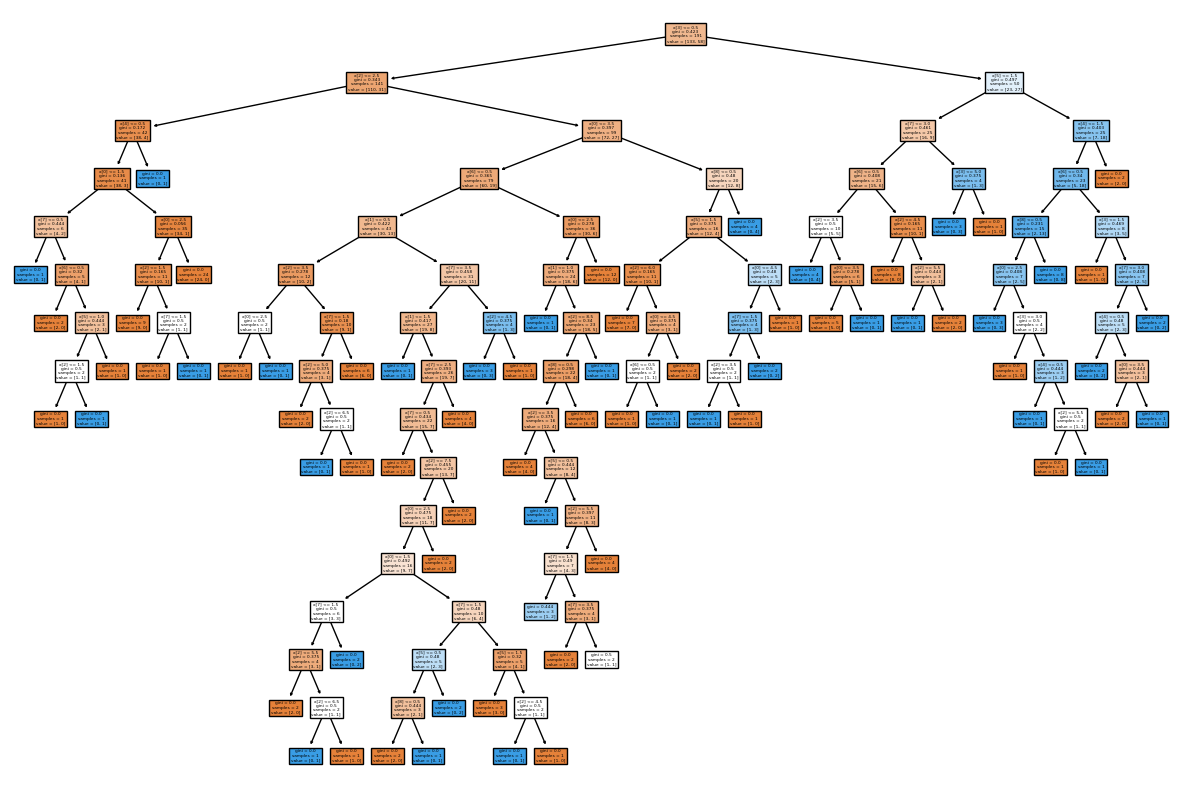

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [ ]:
y_pred=treemodel.predict(X_test)

In [ ]:
print(f'accuracy: {accuracy_score(y_pred,y_test):.6f}')

accuracy: 0.610526


# Default Deciciotn Tree Reports

In [ ]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.69      0.75      0.72        63
           1       0.41      0.34      0.37        32

    accuracy                           0.61        95
   macro avg       0.55      0.54      0.55        95
weighted avg       0.60      0.61      0.60        95



In [ ]:
treemodel_post_pruning = DecisionTreeClassifier(max_depth=6)
treemodel_post_pruning.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [ ]:
treemodel_post_pruning.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=6)

[Text(0.5571808510638298, 0.9285714285714286, 'x[3] <= 0.5\ngini = 0.423\nsamples = 191\nvalue = [133, 58]'),
 Text(0.2898936170212766, 0.7857142857142857, 'x[2] <= 2.5\ngini = 0.343\nsamples = 141\nvalue = [110, 31]'),
 Text(0.1276595744680851, 0.6428571428571429, 'x[4] <= 0.5\ngini = 0.172\nsamples = 42\nvalue = [38, 4]'),
 Text(0.10638297872340426, 0.5, 'x[0] <= 1.5\ngini = 0.136\nsamples = 41\nvalue = [38, 3]'),
 Text(0.0425531914893617, 0.35714285714285715, 'x[2] <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.02127659574468085, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.06382978723404255, 0.21428571428571427, 'x[6] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.0425531914893617, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.0851063829787234, 0.07142857142857142, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.1702127659574468, 0.35714285714285715, 'x[0] <= 2.5\ngini = 0.056\nsamples = 35\nval

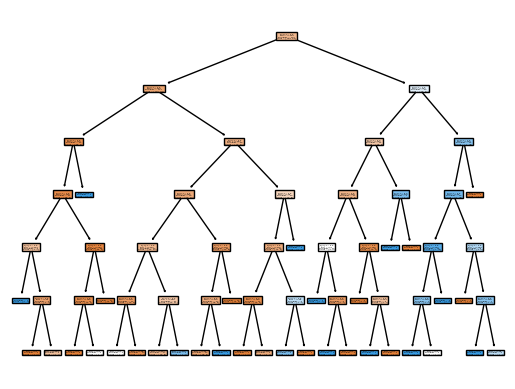

In [ ]:
tree.plot_tree(treemodel_post_pruning,filled=True)


In [ ]:
y_pred_post_pruning =treemodel_post_pruning.predict(X_test)


In [ ]:
print(f'accuracy: {accuracy_score(y_pred_post_pruning,y_test):.6f}')


accuracy: 0.705263


# Post Pruning Deciciotn Tree Reports

In [ ]:
print(classification_report(y_pred_post_pruning,y_test))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        72
           1       0.41      0.48      0.44        23

    accuracy                           0.71        95
   macro avg       0.62      0.63      0.62        95
weighted avg       0.72      0.71      0.71        95



In [ ]:
## Preprunning
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8],
  'max_features':['auto', 'sqrt', 'log2']

}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
treemodel_pre_pruninig=DecisionTreeClassifier()
cv=GridSearchCV(treemodel_pre_pruninig,param_grid=parameter,cv=5,scoring='accuracy')


In [ ]:
cv.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [ ]:
y_pred_pre_pruning=cv.predict(X_test)


In [ ]:
print(f'accuracy: {accuracy_score(y_pred_pre_pruning,y_test):.6f}')

accuracy: 0.747368


# PrePruning Decision Tree Report

In [ ]:
print(classification_report(y_pred_pre_pruning,y_test))


              precision    recall  f1-score   support

           0       0.93      0.77      0.84        82
           1       0.30      0.62      0.40        13

    accuracy                           0.75        95
   macro avg       0.61      0.69      0.62        95
weighted avg       0.84      0.75      0.78        95



In [ ]:
treemodel_cost_complexity=DecisionTreeClassifier()
path = treemodel_cost_complexity.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [ ]:
ccp_alphas

array([0.        , 0.0026178 , 0.00279232, 0.00311643, 0.00314136,
       0.00317309, 0.00339068, 0.0034904 , 0.0034904 , 0.00383944,
       0.0039267 , 0.0039267 , 0.00401396, 0.00407969, 0.00415553,
       0.00456484, 0.00471204, 0.00475964, 0.00528303, 0.00538476,
       0.00577615, 0.0078534 , 0.008726  , 0.00878073, 0.00932889,
       0.0109423 , 0.01140515, 0.01180059, 0.01696335, 0.03961296])

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: 0.039612956982756575


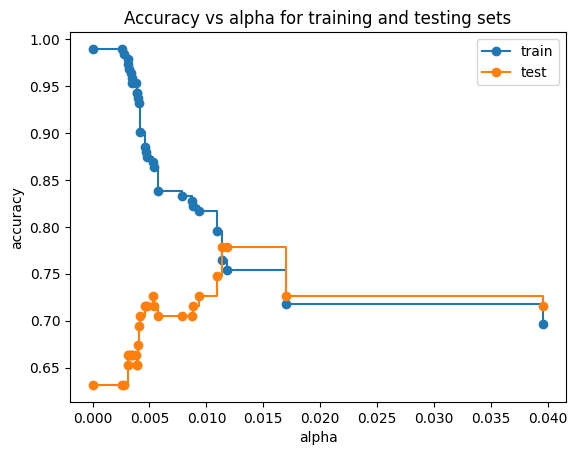

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
treemodel_cost_complexity = DecisionTreeClassifier(random_state=0, ccp_alpha=0.012)
treemodel_cost_complexity.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.012, random_state=0)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.5\ngini = 0.423\nsamples = 191\nvalue = [133, 58]'),
 Text(0.2, 0.5, 'gini = 0.343\nsamples = 141\nvalue = [110, 31]'),
 Text(0.6, 0.5, 'x[5] <= 1.5\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.461\nsamples = 25\nvalue = [16, 9]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.403\nsamples = 25\nvalue = [7, 18]')]

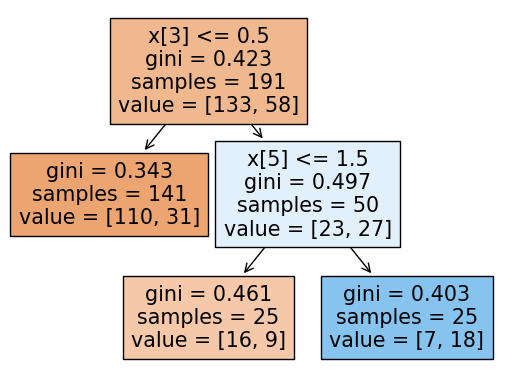

In [ ]:
tree.plot_tree(treemodel_cost_complexity,filled=True)

In [ ]:
y_pred_cost_complexity=treemodel_cost_complexity.predict(X_test)

In [ ]:
print(f'accuracy: {accuracy_score(y_pred_cost_complexity,y_test):.6f}')


accuracy: 0.778947


# Cost Complexity Decision Tree Report

In [ ]:
print(classification_report(y_pred_cost_complexity,y_test))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86        83
           1       0.33      0.75      0.46        12

    accuracy                           0.78        95
   macro avg       0.64      0.77      0.66        95
weighted avg       0.88      0.78      0.81        95



# Proposed Algorithm 1

In [ ]:
pip install chefboost

In [ ]:
from chefboost.training import Training

def findGain(threshold, d, column):
  idx = d[d[column] <= threshold].index
  tmp_d = d.copy()
  tmp_d[column] = '>' + str(threshold)
  tmp_d.loc[idx, column] = '<=' + str(threshold)
  config = {'algorithm': 'CART'}
  gain = Training.findGains(tmp_d, config)['gains'][column]
  return gain

In [ ]:
def change_to_class(columns, decision):
  binary_selection = {}
  for column in columns:
    df_temp = df_train.copy()
    df_temp = df_temp[[column, decision]]
    df_temp.rename(columns={decision : "Decision"}, inplace=True)
    uniques_values = sorted(df_temp[column].unique())
    theresold, mx_gain = 0, 1
    for i in uniques_values:
      gain = findGain(i, df_temp, column)
      if (mx_gain > gain):
        theresold = i
        mx_gain = gain
    binary_selection[column] = theresold
  return binary_selection
    # idx = classified_df[classified_df[column] <= mx_theresold].index
    # classified_df[column] = '>' + str(mx_theresold)
    # classified_df.loc[idx, column] = '<=' + str(mx_theresold)

In [ ]:
print(df_train)

     age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
57     3          0           6          2          0          2       0   
108    3          0           5          0          0          0       1   
272    1          2           3          4          1          1       1   
206    3          0           4          0          0          1       0   
148    2          2           7          0          0          1       1   
..   ...        ...         ...        ...        ...        ...     ...   
188    3          0           9          0          0          1       1   
71     4          0           4          4          2          0       1   
106    4          0           3          4          0          1       0   
270    3          0           4          5          0          2       0   
102    3          0           5          0          0          2       1   

     breast-quad  irradiat  Class  
57             1         0      0  
108            

In [ ]:
numerical_features = []
binary_selection = change_to_class(numerical_features, 'species')
print(binary_selection)

{}


In [ ]:
class SelectRootDecisionTree():
  def __init__(self, criterion = "gini", max_depth = 20):
    self.criterion = criterion
    self.max_depth = max_depth

  def fit(self, X):
    self.X = X.copy();

  def predict(self, X_test):
    X_sub = {}
    DT_set = {}
    for feature in self.X.columns[0: -1]:
      X_sub[feature] = {}
      DT_set[feature] = {}
      if feature in numerical_features:
        X_sub[feature][0] = self.X[self.X[feature] < binary_selection[feature]].drop([feature], axis=1)
        X_sub[feature][1] = self.X[self.X[feature] >= binary_selection[feature]].drop([feature], axis=1)
        DT_set[feature][0] = DecisionTreeClassifier(max_depth = self.max_depth)
        Y_Sub = X_sub[feature][0].iloc[:,-1:]
        X_temp = X_sub[feature][0].iloc[:,:-1]
        DT_set[feature][0] = DT_set[feature][0].fit(X_temp, Y_Sub)
        DT_set[feature][1] = DecisionTreeClassifier(max_depth = self.max_depth)
        Y_Sub = X_sub[feature][1].iloc[:,-1:]
        X_temp = X_sub[feature][1].iloc[:,:-1]
        DT_set[feature][1] = DT_set[feature][1].fit(X_temp, Y_Sub)
      else:
        for label in np.unique(self.X[feature].values):
          X_sub[feature][label] = self.X[self.X[feature].eq(label)].drop([feature], axis=1)
          DT_set[feature][label] = DecisionTreeClassifier(max_depth = self.max_depth)
          Y_Sub = X_sub[feature][label].iloc[:,-1:]
          X_temp = X_sub[feature][label].iloc[:,:-1]
          DT_set[feature][label] = DT_set[feature][label].fit(X_temp, Y_Sub)

    predictions = []
    target = self.X.columns[-1:][0]
    # res = DT_set['Outlook'][1].predict(pd.DataFrame([row[1]],columns=X_test.columns).drop(['Outlook'], axis=1))

    for feature in X_test.columns:
      prediction = []
      for row in X_test.iterrows():
        label = row[1][feature]
        if feature in numerical_features:
          label = row[1][feature] >= binary_selection[feature]
        if label not in list(X_sub[feature].keys()):
          prediction.append(0)
          continue;
        decisions = np.unique(X_sub[feature][label][target].values);
        if (len(decisions) == 1):
          prediction.append(decisions[0]);
          continue
        test_data = pd.DataFrame([row[1]],columns=X_test.columns).drop([feature], axis=1)
        res = DT_set[feature][label].predict(test_data)
        prediction.append(res[0])
      predictions.append(prediction)
    return predictions;
    #     prediction.append()



In [ ]:
proposed_algo_1_dt = SelectRootDecisionTree(max_depth = 4)
proposed_algo_1_dt.fit(df_train)
y_pred_proposed_algo_1 = proposed_algo_1_dt.predict(X_test)
print(X_test.shape)
print(y_pred_proposed_algo_1)

(95, 9)
[[0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], [0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 

In [ ]:
from sklearn.metrics import recall_score
mx_recal, proposed_algo_result = 0, []
for feature_pred in y_pred_proposed_algo_1:
  # print(y_test_proposed_algo_1)
  recall = recall_score(feature_pred, y_test, average='macro')
  if (recall > mx_recal):
    proposed_algo_result = feature_pred
    mx_recal = recall
print(mx_recal)

0.7359307359307359


In [ ]:
print(f'accuracy: {accuracy_score(proposed_algo_result, y_test):.6f}')

accuracy: 0.778947


In [ ]:
print(classification_report(proposed_algo_result, y_test))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86        77
           1       0.44      0.67      0.53        18

    accuracy                           0.78        95
   macro avg       0.68      0.74      0.69        95
weighted avg       0.82      0.78      0.79        95

